# Introduction 

I will be looking at the Heart Disease UCI dataset. The end goal is to build a model to predict heart disease in patients.
Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 1.

Content

Attribute Information: 
> 1. age 
> 2. sex - 0 = female, 1 = male
> 3. chest pain (cp) - type (4 values) 
> 4. trestbps - resting blood pressure 
> 5. chol - serum cholestoral in mg/dl 
> 6. fbs - fasting blood sugar > 120 mg/dl
> 7. restecg - resting electrocardiographic results (values 0,1,2)
> 8. thalach - maximum heart rate achieved 
> 9. exang - exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. slope - the slope of the peak exercise ST segment 
> 12. ca - number of major vessels (0-3) colored by flourosopy 
> 13. thal - 1 = normal; 2 = fixed defect; 3 = reversable defect
> 14. target - 0 = no heart disease found in patient; 1 = presence of heart disease identified

# Loading in the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os 

print(os.listdir('../input'))

['heart.csv']


In [2]:
df = pd.read_csv('../input/heart.csv')

# Understand the structure of Data

Let's observe the shape and structure of the UCI Health Data. We want to see what data types columns are and how many null values there are (if there are any). 

In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Just taking a brief look at the dataset, I can see that out of the 303 samples 54% have the presence of heart disease.

In [9]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

This dataset consists of 96 women, and 207 men. Of the 96 women and 207 men, about 54% have the presence of heart disease in this dataset.

In [10]:
df.groupby(['sex']).mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


This table provides good information as we can see the differences between both genders. Taking a look at the target outcome, we can see that women, on average, appear to be at greater risk of having the presence of heart disease at 75%, while men tend to, on average, have a 45% chance of having heart disease. In short, of the 96 women 75% have heart disease and about 45% of the 207 men have heart disease in this dataset. While these two groups are not equally distributed, I think it is still safe to claim that women have a greater risk of heart disease from this sample. In the next section, I will look at variable correlations with the presence of heart disease.

# Understanding Data with Visualizations

Before checking the correlation among the variables. Let's look at how the data is distributed across the different columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001831A1ADB70>,
      dtype=object)

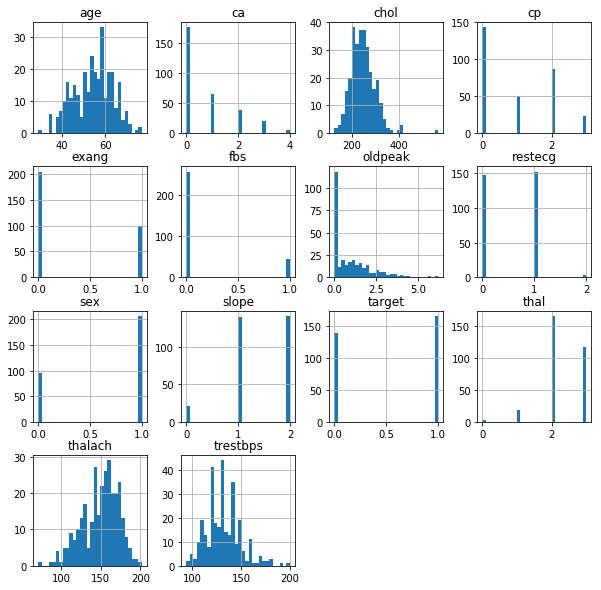

In [11]:
df.hist(figsize = (10,10), bins = 30)


Text(0.5, 1.0, 'Correlation Chart')

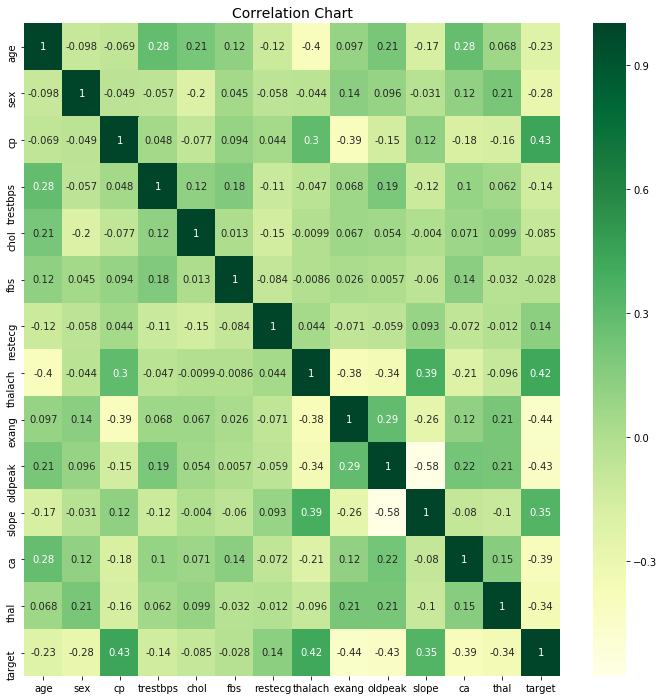

In [12]:
corr = df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot = True, cmap = 'YlGn')
plt.title('Correlation Chart', size = 14)

This correlation helps us better understand the relationship between variables in this dataset. Some correlations better help highlight the data.

    Positive correlations:
        Chest Pain(cp) and Target
        Thalach(max heart rate) and Target
        Slope and Thal
        Slope and Target

    Negative correlations: 
        Thalach and age
        Target and exang
        Target and oldpeak 
        Target and thal
        Target and Ca(number of major vessels)
        
The major relationships I will look into will be thalach, exang, Cp, slope, and Ca in relation to a patient having heart disease. 

In [13]:
thalch_df = pd.crosstab(df['thalach'],df['target'])

In [14]:
thalch_df.head()

target,0,1
thalach,,
71,1,0
88,1,0
90,1,0
95,1,0
96,1,1


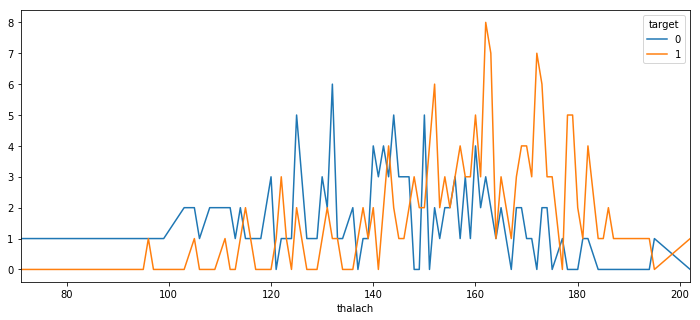

In [15]:
thalch_df.plot(figsize=(12,5))

This chart shows us the changes in maxium heartrate for patients with and without heart disease. From the graph, we can examine that there is more variation in the max heart rate of patients who are at risk of heart disease than those who are not at risk. This makes sense as someone with a more stable heart rate is likely to be a more healthy individual overall. As a result, these individuals tend to be at lower risk of developing heart disease. 

In [16]:
exang_df = pd.crosstab(df['exang'],df['target'])

In [17]:
exang_df

target,0,1
exang,,
0,62,142
1,76,23


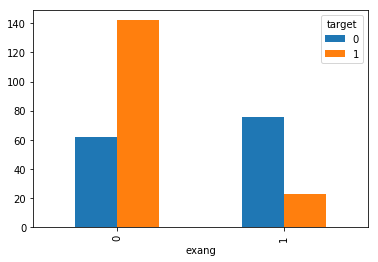

In [18]:
exang_df.plot(kind = "bar")

Angina is a chest pain due to reduced blood flow. This is a surprising variable as I would expect it to be positively correlated with heart disease like other related variables (chest pain, and slope), instead it is the highest negatively correlated variable in relation to heart disease. From the graph, we can infer that people who have not experience exercise enduced angina are more likely to develop heart disease. I think it is a negative correlation because it is only measuring exercise induced angina which I would assume that less people exercise the older they become or they take more care to not overexert themselves.  

In [19]:
cp_df = pd.crosstab(df['cp'],df['target'])

In [20]:
cp_df

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


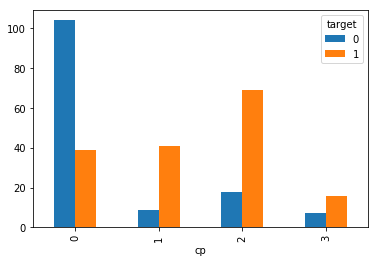

In [21]:
cp_df.plot(kind = "bar")

We need to use a bar graph to illustrate the ordinal variable cp. This graph shows patients with chest pain are more likely to develop heart disease. I think this is one of the key factors in determining heart disease in this sample. Chest pain is the highest positive correlation with heart disease. It also makes sense that as a patient experiences greater levels of chest pain they are more likely to develop heart disease because the heart needs to work harder due to the strain put on it.  

In [22]:
slope_df = pd.crosstab(df['slope'], df['target'])

In [23]:
slope_df

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


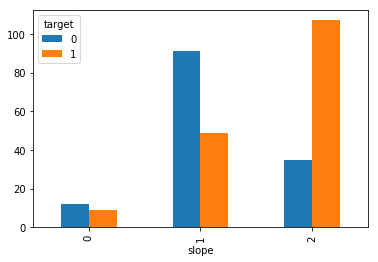

In [24]:
slope_df.plot(kind = "bar")

Slope is another ordinal variable. As the level of slope increases, a patient seems to be more likely to develop heart disease. Slope level 2 proves to be a much greater risk of heart disease than level 0 for patients. This relationship makes sense as a higher level of exercise will lead to greater risk of heart disease 

In [25]:
ca_df = pd.crosstab(df['ca'], df['target'])

In [26]:
ca_df

target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,4


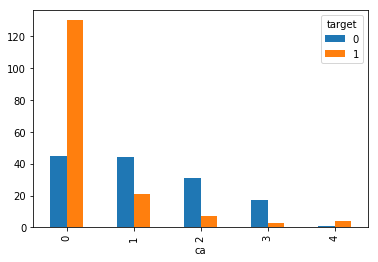

In [27]:
ca_df.plot(kind = "bar")

This bar chart illustrates relationship between the number of major vessels a patient has and there chance of heart disease. It is a negative relationship which is made clear if we look at how a patient with 0 major vessels has a greater chance of contracting a heart disease than someone with 3 vessels. 4 vessels may be overcomensating for the patient or there is not enough points to illustrate the decline of heart disease. 

# Further Analysis of Data

This is supplemental information to provide more insight into the dataset such as the age range of patients and to visualize old information like which gender is more likely to contract heart disease.

In [28]:
age_df = pd.crosstab(df['age'], df['target'])

In [29]:
age_df.head()

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2


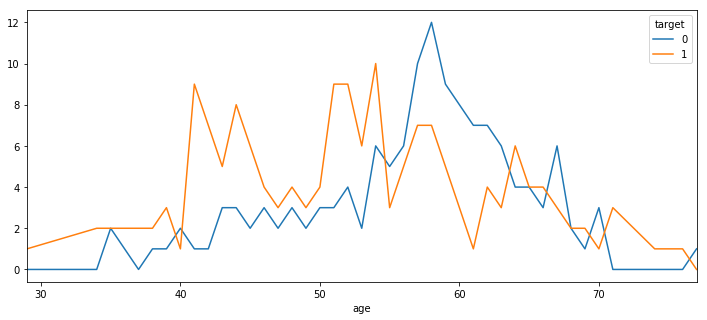

In [30]:
age_df.plot(kind = 'line', figsize = (12,5))

This chart illustrates that any person can contract a form of heart disease and that it can happen at really any age. There is no signficance in the relationship between age and target. It is just an interesting concept that age has no barring on when heart disease can strike.

In [31]:
sex_df = pd.crosstab(df['sex'], df['target'])

In [32]:
sex_df

target,0,1
sex,,
0,24,72
1,114,93


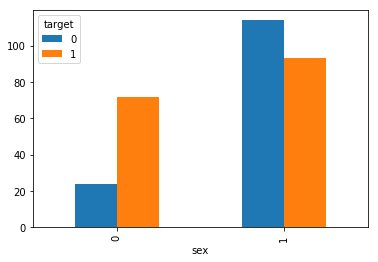

In [33]:
sex_df.plot(kind = "bar")

The graph illustrates, what we discovered in the first look at the data, that women have a greater chance of contracting heart disease than men in this dataset. Women have a 75% chance of contracting heart disease while men have about a 45% chance of heart disease. This accounts for the 96 women and 207 men of the dataset from which about 54% of the patients developed heart disease. 

# Preparation for ML

Before I split the data I want to standardize trestbps, chol, and thalach columns. These columns consist of the continuous variables of dataset and have higher values overall. Standardizing the data makes our continous data columns more beneficial to the model. This is because before these columns were measuring different factors and after standardization it provides a much more accurate model. 

In [34]:
from sklearn.preprocessing import StandardScaler
scaled_df = df.copy()

In [35]:
col_names = ['trestbps','chol','thalach']
scaled = scaled_df[col_names]
scaler = StandardScaler().fit_transform(scaled.values)
scaled_df[col_names] = scaler

c:\users\tgord\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\tgord\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [36]:
scaled_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,0.763956,-0.256334,1,0,0.015443,0,2.3,0,0,1,1
1,37,1,2,-0.092738,0.072199,0,1,1.633471,0,3.5,0,0,2,1
2,41,0,1,-0.092738,-0.816773,0,0,0.977514,0,1.4,2,0,2,1
3,56,1,1,-0.663867,-0.198357,0,1,1.239897,0,0.8,2,0,2,1
4,57,0,0,-0.663867,2.082050,0,1,0.583939,1,0.6,2,0,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001831E786240>,
      dtype=object)

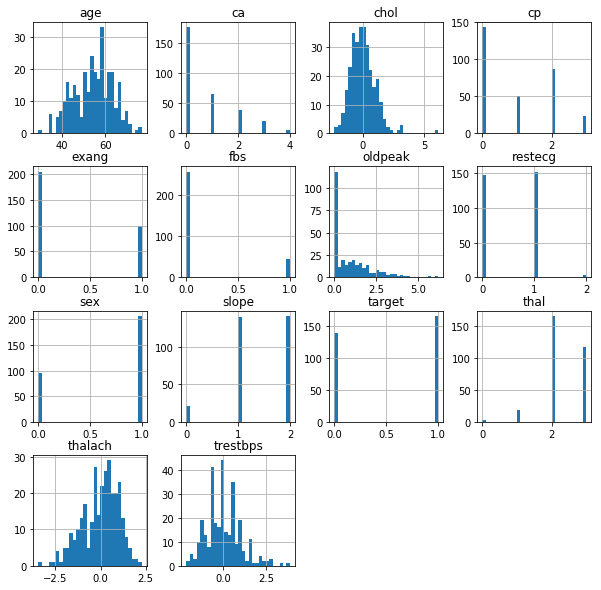

In [37]:
scaled_df.hist(figsize =(10, 10), bins = 30)

In [38]:
array = scaled_df.values
x = array[:, 0:13]
y = array[:, 13]
x.shape, y.shape

((303, 13), (303,))

I appropriately divide the data with the independent variables being assigned to x, and the presence of heart disease (or the target variable) is assigned to y. 

In [39]:
from sklearn.model_selection import train_test_split
testsize = 0.3
seed = 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=testsize, random_state=seed)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(212, 13) (212,) (91, 13) (91,)


The data needs to be split to run a prediciton model for it. I split it assigning 70% of the data values to train the model and the other 30% to test predictions. I split it 70/30 because it is a small dataset with only 303 values and think it would be better to have more test values available to better measure the prediction capabilities of my model .

# Run ML models for Prediction

I will be using Logistic Regression to build this build to predict if patients will have a greater risk of having heart disease (target = 1). I load in Logistic Regression model without an intercept. This was a choice because the data is not suited to an intercept as the continuous values such as age or trestbps do not start 0 and most of the data points are between higher values so having a intercept will not be suitable for this model.

In [40]:
from sklearn.linear_model import LogisticRegression
logRegr = LogisticRegression(solver = 'lbfgs', fit_intercept = False, max_iter = 150)
logRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=150, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
predictions = logRegr.predict(x_test)
score = logRegr.score(x_test, y_test)
print(score * 100)

79.12087912087912


The Logistic Regression Model is about 79% accurate in predicting the presence of heart disease. 

In [42]:
from sklearn import metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

              precision    recall  f1-score   support

         0.0       0.86      0.69      0.77        45
         1.0       0.75      0.89      0.81        46

   micro avg       0.79      0.79      0.79        91
   macro avg       0.80      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91

[[31 14]
 [ 5 41]]


I want a higher recall value for heart disease in this scenario because it is more important to identify if a patient has heart disease even if it is a false positive. I also want a higher Precision value for no heart disease because I want a model that appropriately categorizes no heart disease for a patient who does not acutally have heart disease. According to these guidelines I set for the model, precision and recall are pretty good for the model. This shows that the model is able to reliably return instances in which the patient does not have heart disease (86%) and can identify all instances where they may have heart disease fairly accurately (89%).

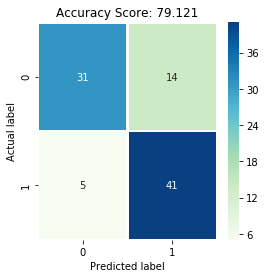

In [43]:
plt.figure(figsize = (4, 4))
sns.heatmap(cm, linewidths = 1.5, cmap = "GnBu", annot = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(score*100, 3))
plt.title(all_sample_title, size = 12);

This is much easier to interpret our model results. Like I mentioned early about the model's precision, this diagram clearly shows 31 of the 36 variables being predicted as false for negative heart disease results (86% precision). Testing patients for the presence of heart disease is a lot more reliable at identifying positives overall, but doesn't have as much precision for predicting actual positive results (89% recall with 69% precision).

# Conclusions

With some visualizations and a logistic regression model completed, it's time to reflect on the data found in the Heart Disease UCI Dataset. Looking at the visualizations in section 4, we can see the relationship some of the significant variables have with the target variable. From max heartrate (thalch), we can observe that patients with more erratic max heart rate are at greater risk of heart disease. Patients with greater level of chest pain are at greater risk of heart disease. Slope tied to exercise and is measured by levels. With each level, the patient is at a greater risk of heart disease. One of the most decisive variable which has negative relationship with target, I believe, is the # of major vessels (ca). This variable shows that patients with more major blood vessels are less likely to develop heart disease. Some other observations I discovered were that patients at any age could contract heart disease. From this dataset, 96 women have a greater risk of having heart disease (75%) compared to the sample 207 men (~45%). One thing I would hope for in a revised dataset is more variables that could provide more insight into the backgrounds of the patients. New variables might include income level, level of stress, history of heart disease, drug history, and weight. A larger sample size and potentially more balanced sample could also help deliver a more accurate model. I think these variables might reveal more insights about who is at greater risk of heart disease and allow us to develop a more accurate prediction model. 